In [36]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

%matplotlib inline

In [37]:
with open("andmesh.txt") as f:
    Lagu = f.read()

Lagu = [re.sub('[^A-Za-z0-9 ]+', '', andmesh).lower() for andmesh in Lagu.split("\n")]

Lagu

['waktu pertama kali',
 'kulihat dirimu hadir',
 'rasa hati ini inginkan dirimu',
 'hati tenang mendengar',
 'suara indah menyapa',
 'geloranya hati ini tak kusangka',
 'rasa ini tak tertahan',
 'hati ini selalu untukmu',
 'terimalah lagu ini',
 'dari orang biasa',
 'tapi cintaku padamu luar biasa',
 'aku tak punya bunga',
 'aku tak punya harta',
 'yang kupunya hanyalah hati yang setia',
 'tulus padamu',
 'harihari berganti',
 'kini cinta pun hadir',
 'melihatmu memandangmu bagai bidadari',
 'lentik indah matamu',
 'manis senyum bibirmu',
 'hitam panjang rambutmu anggun terikat',
 'rasa ini tak tertahan',
 'hati ini selalu untukmu',
 'terimalah lagu ini',
 'dari orang biasa',
 'tapi cintaku padamu luar biasa',
 'aku tak punya bunga',
 'aku tak punya harta',
 'yang kupunya hanyalah hati yang setia',
 'tulus padamuu',
 'ooooh ',
 'terimalah lagu ini',
 'hmm ',
 'dari orang biasa',
 'terimalah lagu ini',
 'dari orang biasa',
 'tapi cintaku padamu luar biasa',
 'aku tak punya bunga',
 'aku

In [38]:
with open("stopwords.txt", encoding="utf8") as f:
    stopwords = f.read().split('\n')
    
stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut',
 'berik

In [39]:
Album_lagu = ' '.join(Lagu)
Album_lagu

'waktu pertama kali kulihat dirimu hadir rasa hati ini inginkan dirimu hati tenang mendengar suara indah menyapa geloranya hati ini tak kusangka rasa ini tak tertahan hati ini selalu untukmu terimalah lagu ini dari orang biasa tapi cintaku padamu luar biasa aku tak punya bunga aku tak punya harta yang kupunya hanyalah hati yang setia tulus padamu harihari berganti kini cinta pun hadir melihatmu memandangmu bagai bidadari lentik indah matamu manis senyum bibirmu hitam panjang rambutmu anggun terikat rasa ini tak tertahan hati ini selalu untukmu terimalah lagu ini dari orang biasa tapi cintaku padamu luar biasa aku tak punya bunga aku tak punya harta yang kupunya hanyalah hati yang setia tulus padamuu ooooh  terimalah lagu ini hmm  dari orang biasa terimalah lagu ini dari orang biasa tapi cintaku padamu luar biasa aku tak punya bunga aku tak punya harta yang kupunya hanyalah hati yang setia yang kupunya hanyalah hati yang setia terimalah cintaku yang luar biasa tulus padamu lama sudah ku

In [40]:
count_vectorizer = CountVectorizer()
bow = count_vectorizer.fit_transform(Lagu)
sum_words = bow.sum(axis=0)

In [41]:
Lagu = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items() if sum_words[0, idx] > 5]
Lagu = sorted(Lagu, key = lambda x: x[1], reverse=True)
Album_lagu = pd.DataFrame(Lagu, columns = ['Kata' , 'Jumlah'])
Album_lagu.head(20)

,Kata,Jumlah
0,tak,41
1,ini,34
2,ku,34
3,yang,26
4,dia,19
5,hati,17
6,aku,17
7,kau,16
8,kuingin,14
9,akan,13


In [48]:
Lagu = [(word, count) for word, count in Lagu if word not in stopwords] 
Lagu

[('hati', 17),
 ('kuingin', 14),
 ('cinta', 12),
 ('sayangku', 11),
 ('oh', 10),
 ('hidupmu', 10),
 ('sayang', 10),
 ('bersamaku', 9),
 ('syukuri', 9),
 ('cintaku', 8),
 ('bahagia', 8),
 ('rindu', 8),
 ('senyumlah', 8),
 ('hatiku', 7),
 ('kumau', 7),
 ('susah', 7),
 ('tuhan', 7),
 ('hatimu', 7),
 ('kucinta', 7),
 ('cintamu', 6),
 ('slalu', 6)]

In [43]:
Album_wordcloud = ' '.join([word for word, index in Lagu])
Album_wordcloud

'hati kuingin cinta sayangku oh hidupmu sayang bersamaku syukuri cintaku bahagia rindu senyumlah hatiku kumau susah tuhan hatimu kucinta cintamu slalu'

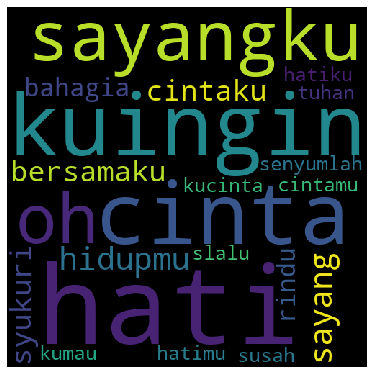

In [47]:
wordcloud = (WordCloud(width=500, height=500, background_color="black")).generate(Album_wordcloud) 
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()